In [3]:
from scipy.integrate import solve_ivp
from functools import partial
import numpy as np

In [4]:
# Question 2
def my_lorenz(t, S, sigma, rho, beta):
    x, y, z = S
    dt = 0.1
    dx = sigma * (y-x)
    dy = x * (rho -z) - y
    dz = x * y - beta * z
    dS = [dx, dy, dz]
    return dS

In [5]:
s = np.array([1, 2, 3])
my_lorenz(0, s, 10, 28, 8/3)

[10, 23, -6.0]

In [6]:
# Question 3
def my_lorenz_solver(t_span,s0,sigma,rho,beta):
    F = partial(my_lorenz, sigma=sigma, rho=rho, beta=beta)
    times = np.arange(t_span[0], t_span[1], 0.001)
    sol = solve_ivp(F, t_span, s0, t_eval= times)
    T = sol.t
    [X, Y, Z] = sol.y
    return [T, X, Y, Z]

In [7]:
sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])
[T, X, Y, Z] = my_lorenz_solver([t0, tf], s0, sigma, rho, beta)

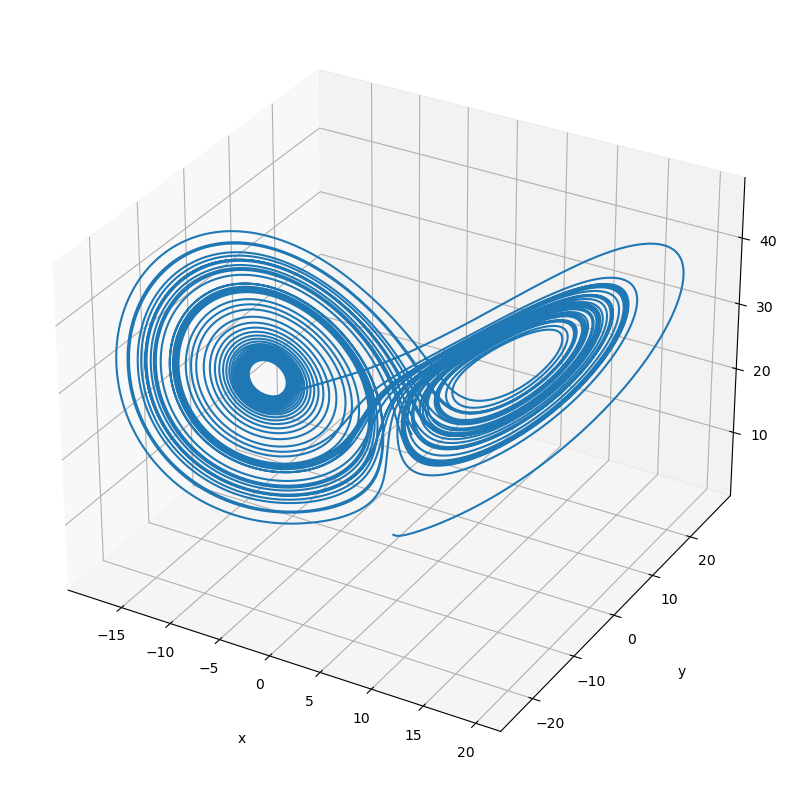

In [8]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")
ax.grid()
ax.plot3D(X, Y, Z)
# Set axes label
ax.set_xlabel("x", labelpad=20)
ax.set_ylabel("y", labelpad=20)
ax.set_zlabel("z", labelpad=20)
plt.show()

In [9]:
# Question 4
def my_msd(t,S,m,c,k):
    A = np.matrix([[0,1],[-k/m,-c/m]])
    ds = np.dot(A, np.array(S).T)
    return ds

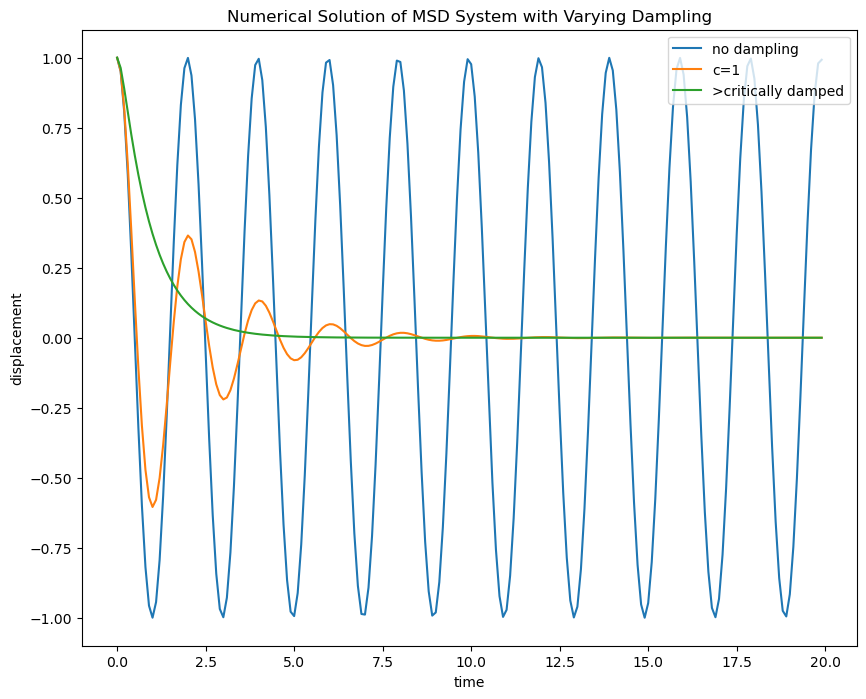

In [10]:
m = 1
k = 10

f = partial(my_msd, m=m, c=0, k=k)
t_e = np.arange(0, 20, 0.1)
sol_1=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=1, k=k)
sol_2=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=10, k=k)
sol_3=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

plt.figure(figsize = (10, 8))
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.title("Numerical Solution of MSD System with Varying Dampling")
plt.xlabel("time")
plt.ylabel("displacement")
plt.legend(["no dampling", "c=1", ">critically damped"], loc=1)
plt.show()